In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

# Data Overview

In [2]:
df = pd.read_csv('Project.csv')
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

# EDA

In [4]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   transaction_qty   149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   Total_Bill        149116 non-null  float64       
 9   product_category  149116 non-null  object        
 10  product_type      149116 non-null  object        
 11  product_detail    149116 non-null  object        
 12  Size              149116 non-null  object        
 13  Month Name        149116 non-null  object        
 14  Day 

# Determining Stationarity

In [6]:
df_model = df.copy()
df_model = df[['transaction_date', 'Total_Bill']]
df_model.rename(columns={'transaction_date':'date',
                         'Total_Bill':'sales'}, inplace=True)
df_model = df_model.sort_values(by='date', ascending=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11132\1176722522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.rename(columns={'transaction_date':'date',


C:\Users\User\AppData\Local\Temp\ipykernel_11132\2443525859.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='mediumblue', label='Total Sales', ci=None)


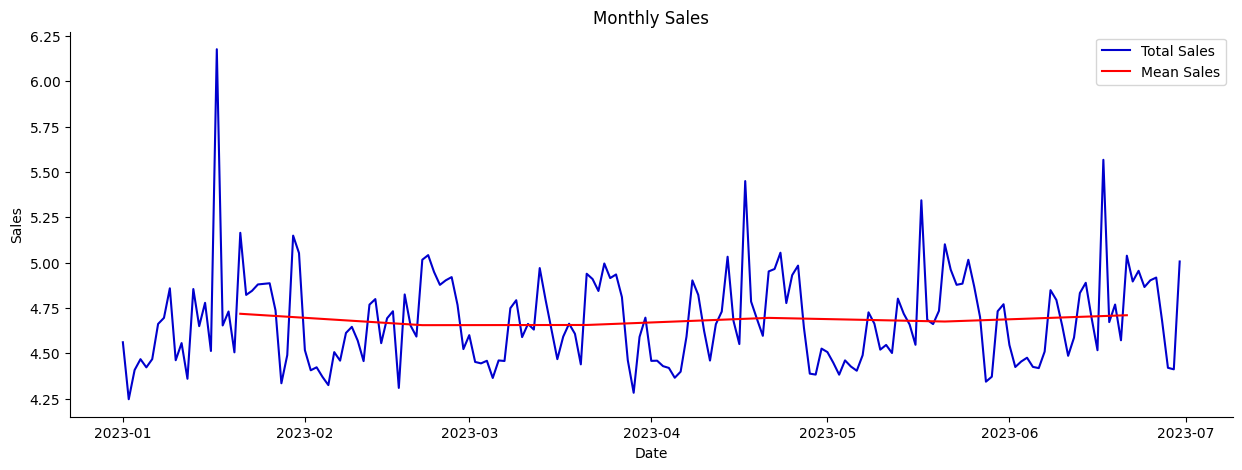

In [7]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='mediumblue', label='Total Sales', ci=None)
    
    second = data.groupby(data.date.dt.month)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%m')
    second.date = second.date.apply(lambda x: x.replace(year=2023))
    sns.lineplot(x=(second.date + datetime.timedelta(20)), y=y_col, data=second, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()

time_plot(df_model, 'date', 'sales', 'Monthly Sales')

In [8]:
def get_diff(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    
    data.to_csv('stationary_df.csv')
    return data

stationary_df = get_diff(df_model)

C:\Users\User\AppData\Local\Temp\ipykernel_11132\2443525859.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='mediumblue', label='Total Sales', ci=None)


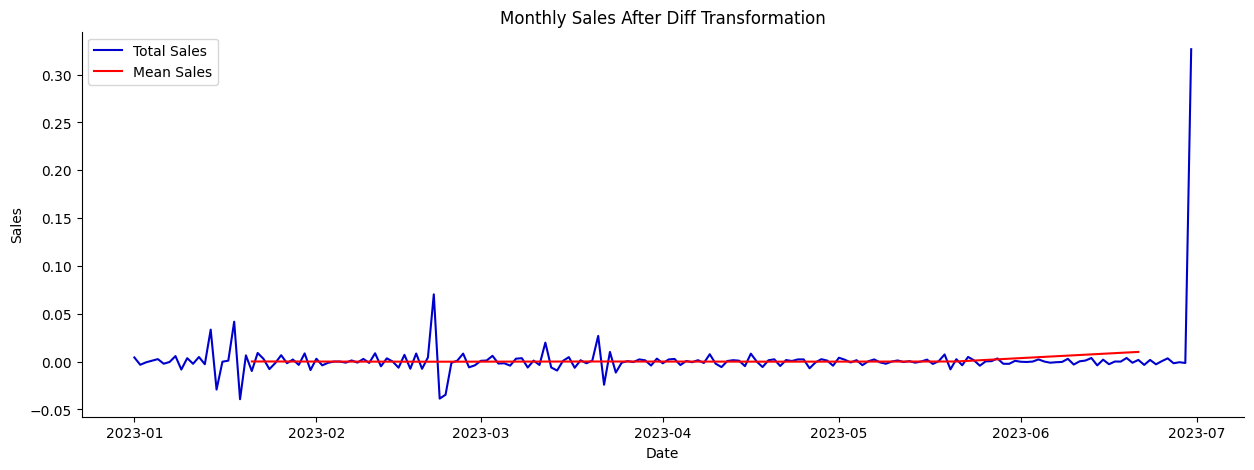

In [9]:
time_plot(stationary_df, 'date', 'sales_diff', 'Monthly Sales After Diff Transformation')

# Observing Lags

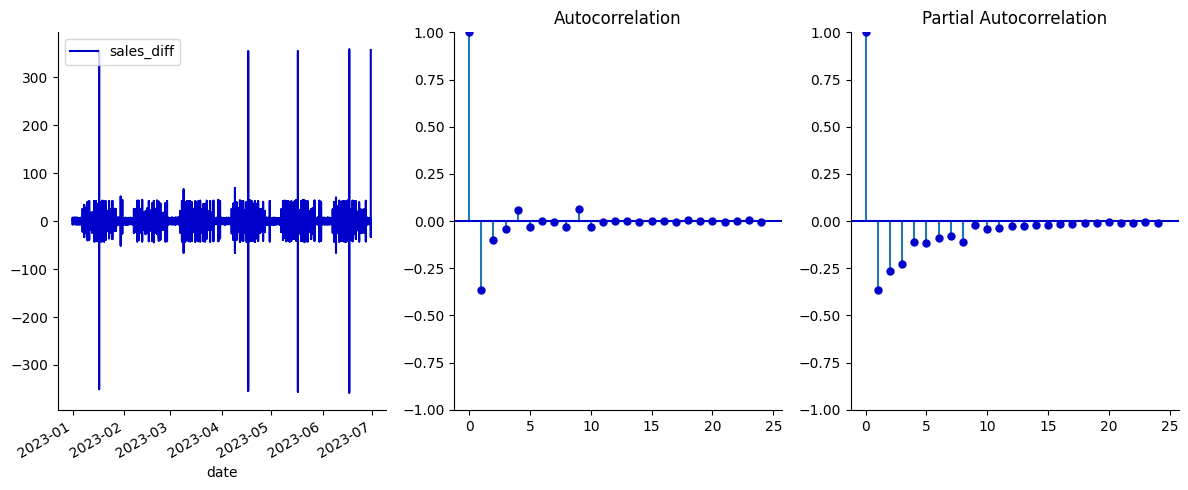

In [10]:
def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=24)

# Preparing Dataset Modeling

## Regressive Modeling

In [11]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,4):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    supervised_df.to_csv('model_df.csv', index=False)
    
    return supervised_df

In [12]:
model_df = generate_supervised(stationary_df)

In [13]:
model_df

,date,sales,sales_diff,lag_1,lag_2,lag_3
0,2023-01-01,4.00,0.00,1.00,0.00,0.45
1,2023-01-01,3.75,-0.25,0.00,1.00,0.00
2,2023-01-01,3.75,0.00,-0.25,0.00,1.00
3,2023-01-01,7.50,3.75,0.00,-0.25,0.00
4,2023-01-01,3.75,-3.75,3.75,0.00,-0.25
...,...,...,...,...,...,...
149107,2023-06-30,3.25,-4.25,0.00,0.00,0.00
149108,2023-06-30,3.25,0.00,-4.25,0.00,0.00
149109,2023-06-30,3.25,0.00,0.00,-4.25,0.00
149110,2023-06-30,3.25,0.00,0.00,0.00,-4.25


# Arima Modeling

In [14]:
def generate_arima_data(data):
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)
    
    dt_data.to_csv('arima_df.csv')
    
    return dt_data

In [15]:
datetime_df = generate_arima_data(stationary_df)

In [16]:
datetime_df

,sales_diff
date,
2023-01-01,0.45
2023-01-01,0.00
2023-01-01,1.00
2023-01-01,0.00
2023-01-01,-0.25
...,...
2023-06-30,-4.25
2023-06-30,0.00
2023-06-30,0.00


In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
# from keras.utils import np_utils 
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from datetime import datetime, timedelta

import pickle

# Train Test Split

In [18]:
def tts(data):
    data = data.drop(['sales','date'],axis=1)
    train, test = data[0:-12].values, data[-12:].values
    
    return train, test

train, test = tts(model_df)

In [19]:
train.shape

(149100, 4)

In [20]:
test.shape

(12, 4)

In [21]:
def scale_data(train_set, test_set):
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)

In [22]:
y_train.shape

(149100,)

# Modeling Functions

In [23]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):  
    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))
        
    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

In [24]:
def load_original_df():
    #load in original dataframe without scaling applied
    original_df = df_model
    original_df.date = original_df.date.apply(lambda x: str(x)[:-3])
    original_df = original_df.groupby('date')['sales'].sum().reset_index()
    original_df.date = pd.to_datetime(original_df.date)
    return original_df

In [25]:
def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted sales
    result_list = []
    sales_dates = list(original_df[-13:].date)
    act_sales = list(original_df[-13:].sales)
    
    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_sales[index])
        result_dict['date'] = sales_dates[index+1]
        result_list.append(result_dict)
        
    df_result = pd.DataFrame(result_list)
    
    return df_result

In [26]:
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.sales[-12:], unscaled_df.pred_value[-12:]))
    mae = mean_absolute_error(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    r2 = r2_score(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [27]:
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=original_df.date, y=original_df.sales, data=original_df, ax=ax, 
                 label='Original', color='mediumblue')
    sns.lineplot(x=results.date, y=results.pred_value, data=results, ax=ax, 
                 label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = f"{model_name} Sales Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    
#   plt.savefig(f'../model_output/{model_name}_forecast.png')

In [28]:
def run_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
      
    get_scores(unscaled_df, original_df, model_name)
    
    plot_results(unscaled_df, original_df, model_name)

# Linear Regression

RMSE: 569.6218846451272
MAE: 417.9049999999999
R2 Score: -0.231312706831996


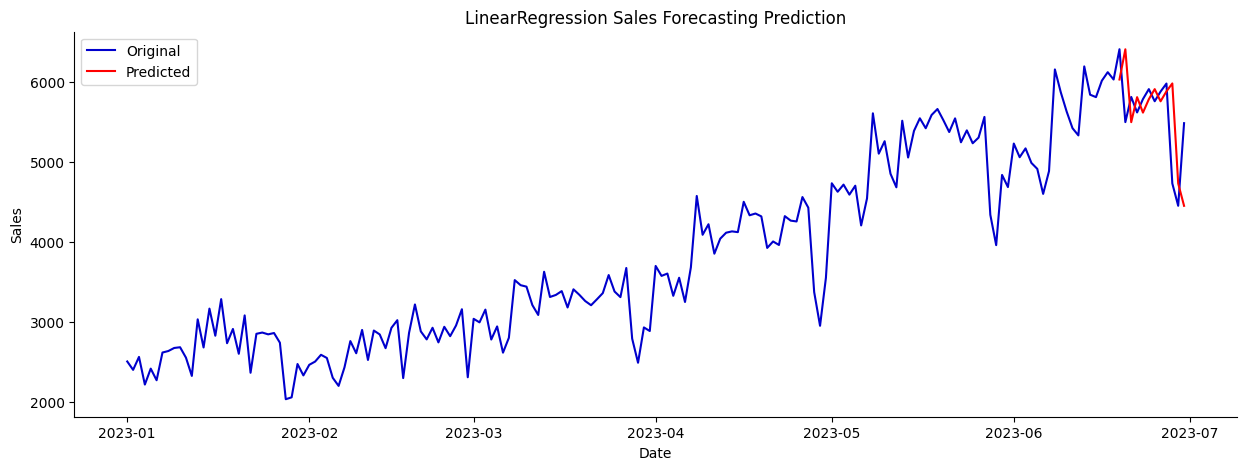

In [29]:
run_model(train, test, LinearRegression(), 'LinearRegression')

RMSE: 569.6019500200703
MAE: 418.07166666666654
R2 Score: -0.23122652570625046


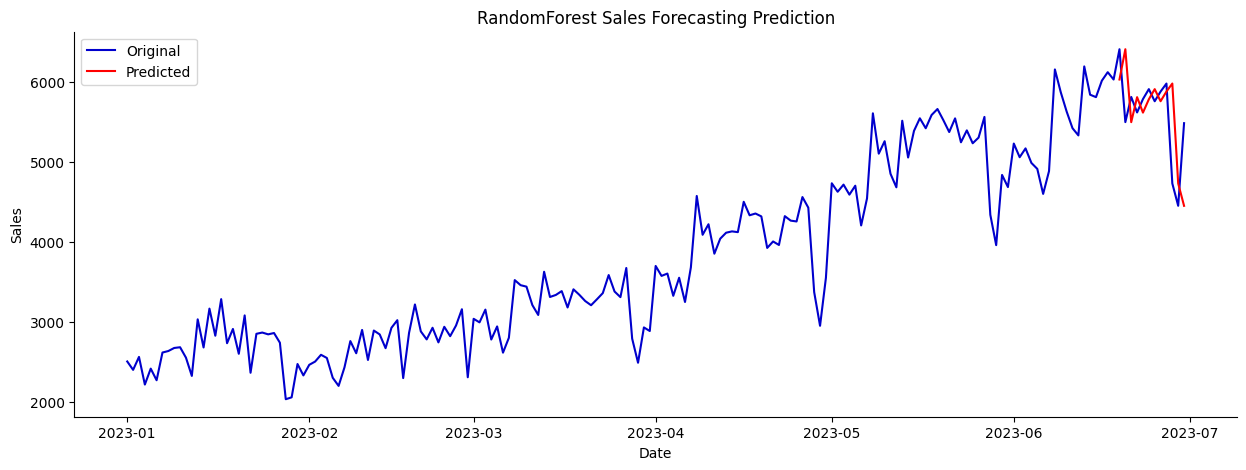

In [30]:
run_model(train, test, RandomForestRegressor(n_estimators=100, max_depth=20), 
          'RandomForest')

RMSE: 569.4180828998437
MAE: 417.82166666666654
R2 Score: -0.23043177583704622


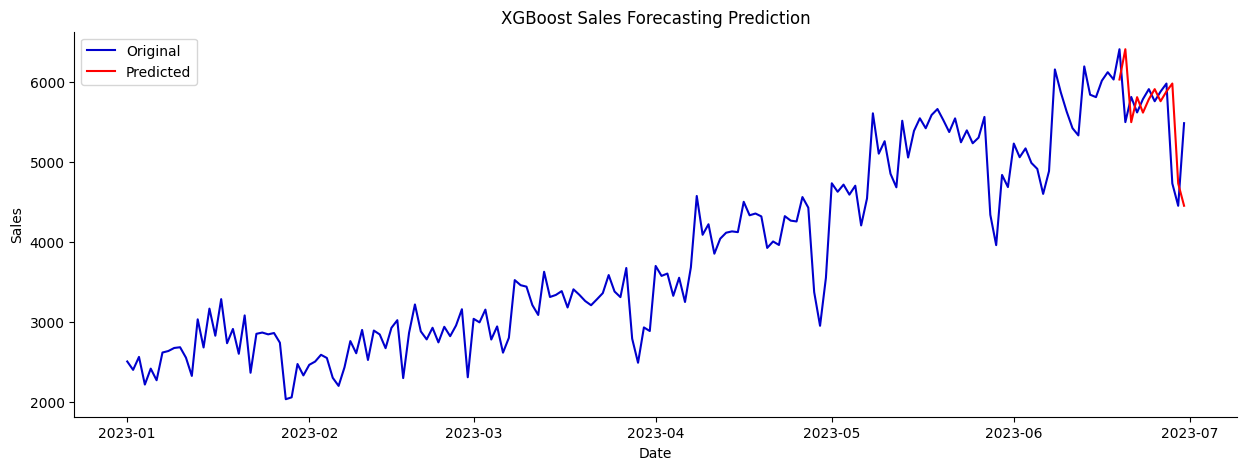

In [31]:
run_model(train, test, XGBRegressor( n_estimators=100, 
                                    learning_rate=0.2, 
                                    objective='reg:squarederror'), 'XGBoost')

In [32]:
def lstm_model(train_data, test_data):
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
    model = Sequential()
    model.add(LSTM(4, input_shape=(X_train.shape[1], X_train.shape[2]), stateful=True))  # Modified line
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    # ... (rest of your code remains the same)
    
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    
    get_scores(unscaled_df, original_df, 'LSTM')
    
    plot_results(unscaled_df, original_df, 'LSTM')

In [33]:
# lstm_model(train, test)

In [34]:
# pickle.dump(model_scores, open( "model_scores.p", "wb" ) )

# Recommendation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_rec = df[['product_category', 'product_type', 'product_detail']]
df_rec['product'] = df[[
    'product_type', 'product_detail']].agg(
        lambda x: ' '.join(x.values), axis=1)
df_rec = df_rec[['product_category','product']].rename(
    columns={'product_category':'category'}
)
df_rec['title'] = df['product_type']
df_rec = df_rec.drop_duplicates(subset=['product'])
df_rec = df_rec.reset_index()

In [ ]:
df_rec['id'] = df_rec.index + 1
df_rec = df_rec[['id','title','product']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000, stop_words='english')

In [ ]:
vector=cv.fit_transform(df_rec['product'].values.astype('U')).toarray()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vector)

In [ ]:
def recommand(movies):
    index=df_rec[df_rec['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(df_rec.iloc[i[0]].title)

In [ ]:
recommand('Drip coffee')